In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV (replace path if needed)
df = pd.read_csv("D:/nhldraft.csv")


In [12]:
# Filter for players with complete career data (non-null point shares and games played)
complete_players = df[(df['games_played'].notna()) & (df['point_shares'].notna())]

# Drop goalie-specific columns
non_goalie_df = complete_players.drop(columns=[
    'goalie_games_played', 'goalie_wins', 'goalie_losses',
    'goalie_ties_overtime', 'save_percentage', 'goals_against_average'
])

# Drop rows with missing key data
clean_df = non_goalie_df.dropna(subset=[
    'year', 'overall_pick', 'team', 'player', 'nationality', 'position', 'age',
    'amateur_team', 'games_played', 'goals', 'assists', 'points',
    'plus_minus', 'penalties_minutes', 'point_shares'
])


In [10]:
clean_df.loc[:, 'points_per_game'] = clean_df['points'] / clean_df['games_played']
clean_df.loc[:, 'goals_per_game'] = clean_df['goals'] / clean_df['games_played']
clean_df.loc[:, 'assists_per_game'] = clean_df['assists'] / clean_df['games_played']
clean_df.loc[:, 'penalty_rate'] = clean_df['penalties_minutes'] / clean_df['games_played']
clean_df = clean_df.loc[clean_df['points_per_game'] < 2]



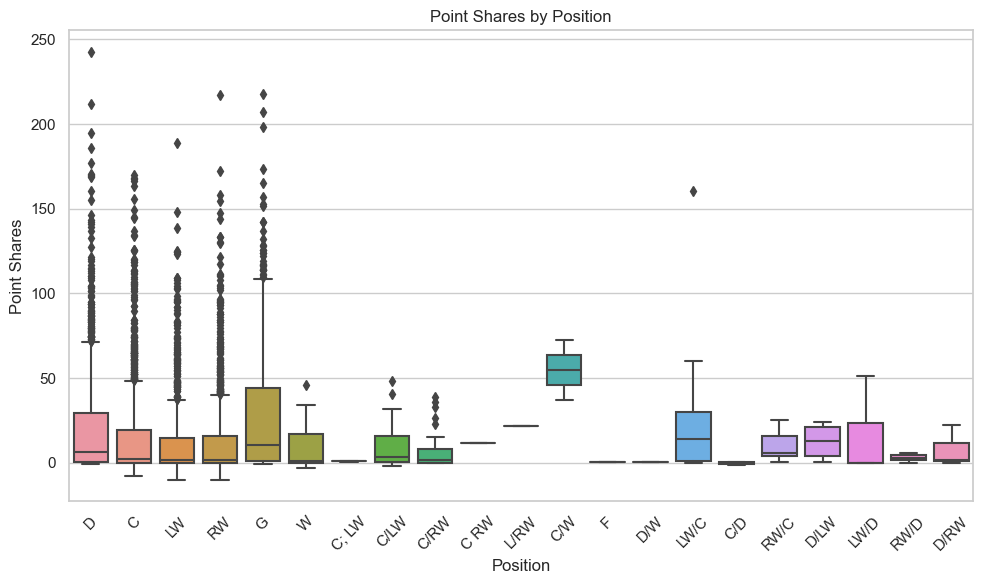

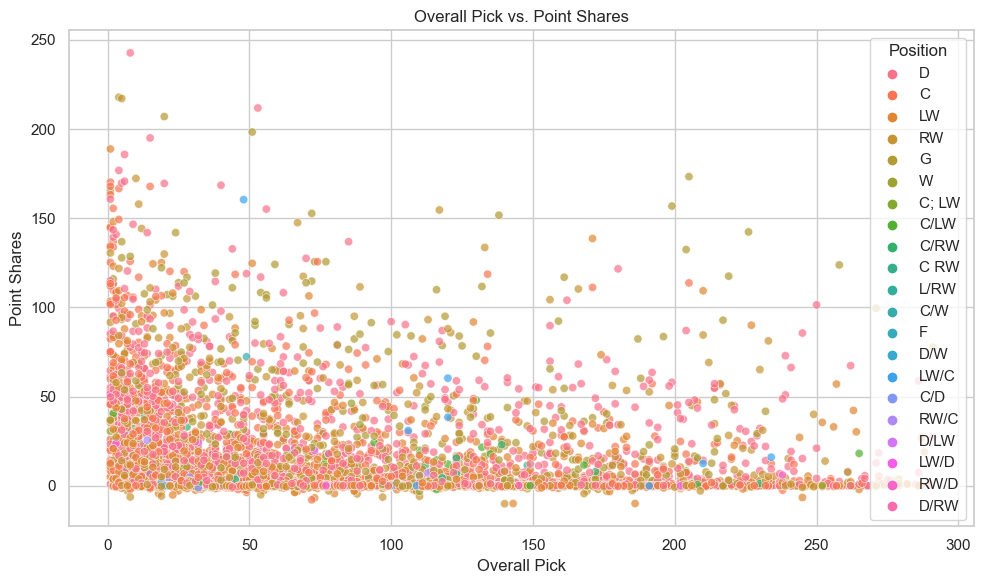

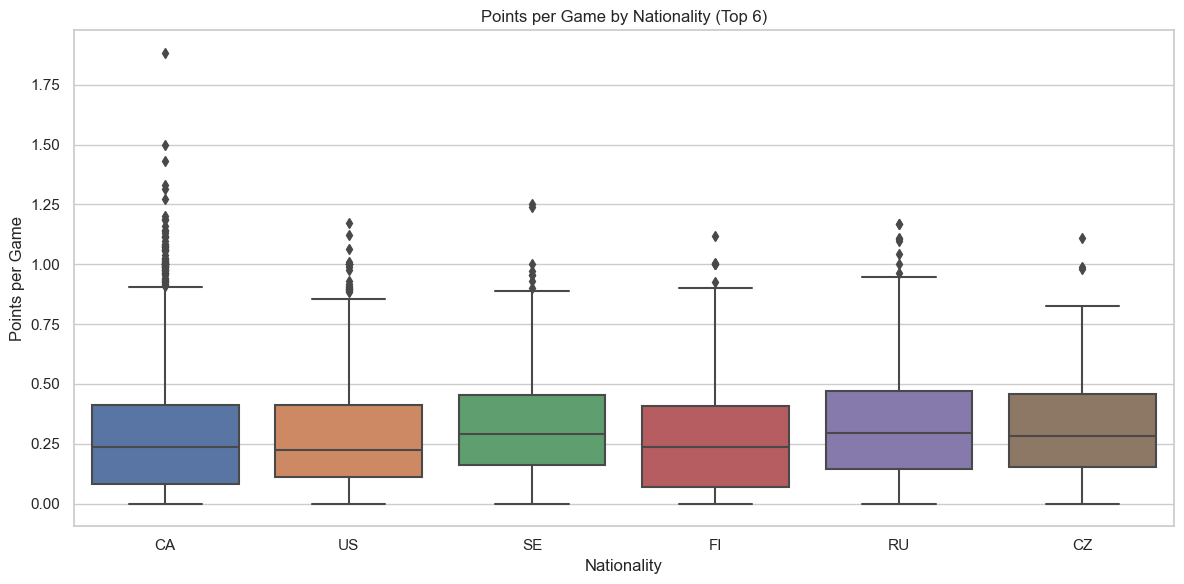

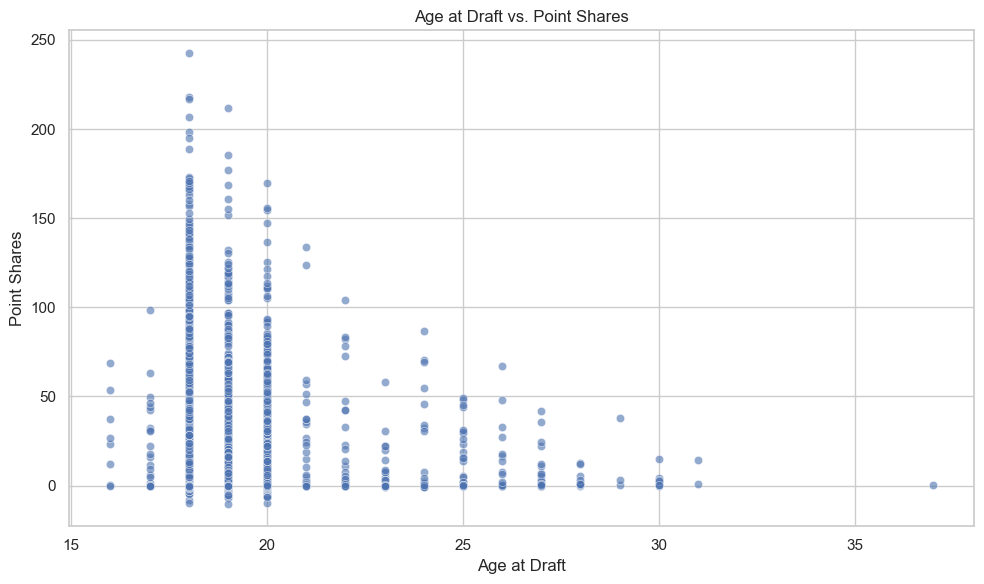

In [7]:
sns.set(style="whitegrid")

# 1. Point Shares by Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='position', y='point_shares')
plt.title("Point Shares by Position")
plt.xlabel("Position")
plt.ylabel("Point Shares")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Overall Pick vs. Point Shares
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='overall_pick', y='point_shares', hue='position', alpha=0.7)
plt.title("Overall Pick vs. Point Shares")
plt.xlabel("Overall Pick")
plt.ylabel("Point Shares")
plt.legend(title='Position')
plt.tight_layout()
plt.show()

# 3. Points per Game by Nationality (Top 6)
top_nations = clean_df['nationality'].value_counts().nlargest(6).index
subset_nations = clean_df[clean_df['nationality'].isin(top_nations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_nations, x='nationality', y='points_per_game')
plt.title("Points per Game by Nationality (Top 6)")
plt.xlabel("Nationality")
plt.ylabel("Points per Game")
plt.tight_layout()
plt.show()

# 4. Age at Draft vs. Point Shares
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='age', y='point_shares', alpha=0.6)
plt.title("Age at Draft vs. Point Shares")
plt.xlabel("Age at Draft")
plt.ylabel("Point Shares")
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Make a copy for modeling
model_df = clean_df.copy()

# Select relevant features for predicting 'point_shares'
features = ['overall_pick', 'age', 'points_per_game', 'goals_per_game', 'assists_per_game', 'penalty_rate']
X = model_df[features]
y = model_df['point_shares']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Mean Squared Error:", round(mse, 2))
print("📈 R-squared Score:", round(r2, 2))

# Show feature importances
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)


📊 Mean Squared Error: 620.77
📈 R-squared Score: 0.3
            Feature  Coefficient
0      overall_pick    -0.038790
1               age    -0.674827
2   points_per_game    69.643784
3    goals_per_game   -35.887642
4  assists_per_game     5.830713
5      penalty_rate    -0.658399


In [9]:
clean_df.to_csv("cleaned_nhl_draft_for_dashboard.csv", index=False)
